## Problem: Analysing Dow Jones Industrial Average(DJIA)  stock prices using Linear Regression
We analysed the future price of (DJIA) stock using Simple Linear Regression. The data that we used in this problem is a real data obtained from Kaggle datasets saved to csv file, DJIA.csv

In the dataset of the problem, we analysed the prices of Dow Jones Industrial Average (DJIA) market performance from 2008-08-08 to 2016-07-01. We used Scikit-learn,csv,numpy and matplotlib packages to implement and visualize simple regression.

In [2]:
#This can be used for classification, regression, clouding
import sklearn 
from sklearn import datasets
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#loading data from external file
ndamu = pd.read_csv('DJIA_table.csv')

In [4]:
ndamu

Date          Open          High           Low         Close  \
0     2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1     2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2     2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3     2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4     2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
5     2016-06-24  17946.630859  17946.630859  17356.339844  17400.750000   
6     2016-06-23  17844.109375  18011.070312  17844.109375  18011.070312   
7     2016-06-22  17832.669922  17920.160156  17770.359375  17780.830078   
8     2016-06-21  17827.330078  17877.839844  17799.800781  17829.730469   
9     2016-06-20  17736.869141  17946.359375  17736.869141  17804.869141   
10    2016-06-17  17733.439453  17733.439453  17602.779297  17675.160156   
11    2016-06-16  17602.230469  17754.910156  17471.289062  17733.099609   
12    2016-06-15  17703.650391  17762.960938  17629.009766  17640.169922   
13    2016-06-14  17710.769531  17733.919922  17595.789062  17674.820312   
14    2016-06-13  17830.500000  17893.279297  17731.349609  17732.480469   
15    2016-06-10  17938.820312  17938.820312  17812.339844  17865.339844   
16    2016-06-09  17969.980469  18005.220703  17915.880859  17985.189453   
17    2016-06-08  17931.910156  18016.000000  17931.910156  18005.050781   
18    2016-06-07  17936.220703  18003.230469  17936.220703  17938.279297   
19    2016-06-06  17825.689453  17949.679688  17822.810547  17920.330078   
20    2016-06-03  17799.800781  17833.169922  17689.679688  17807.060547   
21    2016-06-02  17789.050781  17838.560547  17703.550781  17838.560547   
22    2016-06-01  17754.550781  17809.179688  17664.789062  17789.669922   
23    2016-05-31  17891.500000  17899.240234  17724.029297  17787.199219   
24    2016-05-27  17826.849609  17873.220703  17824.730469  17873.220703   
25    2016-05-26  17859.519531  17888.660156  17803.820312  17828.289062   
26    2016-05-25  17735.089844  17891.710938  17735.089844  17851.509766   
27    2016-05-24  17525.189453  17742.589844  17525.189453  17706.050781   
28    2016-05-23  17507.039062  17550.699219  17480.050781  17492.929688   
29    2016-05-20  17437.320312  17571.750000  17437.320312  17500.939453   
...          ...           ...           ...           ...           ...   
1959  2008-09-19  11027.509766  11483.049805  11026.700195  11388.440430   
1960  2008-09-18  10609.009766  11076.440430  10459.440430  11019.690430   
1961  2008-09-17  11056.580078  11057.309570  10595.900391  10609.660156   
1962  2008-09-16  10905.620117  11093.219727  10742.700195  11059.019531   
1963  2008-09-15  11416.370117  11416.450195  10917.509766  10917.509766   
1964  2008-09-12  11429.320312  11459.929688  11280.400391  11421.990234   
1965  2008-09-11  11264.440430  11445.679688  11098.669922  11433.709961   
1966  2008-09-10  11233.910156  11380.629883  11215.259766  11268.919922   
1967  2008-09-09  11514.730469  11577.500000  11230.730469  11230.730469   
1968  2008-09-08  11224.870117  11570.660156  11224.790039  11510.740234   
1969  2008-09-05  11185.629883  11245.150391  11037.849609  11220.959961   
1970  2008-09-04  11532.480469  11532.480469  11176.019531  11188.230469   
1971  2008-09-03  11506.009766  11554.379883  11416.530273  11532.879883   
1972  2008-09-02  11545.629883  11790.169922  11471.900391  11516.919922   
1973  2008-08-29  11713.230469  11713.230469  11543.389648  11543.959961   
1974  2008-08-28  11499.870117  11715.179688  11499.790039  11715.179688   
1975  2008-08-27  11412.459961  11554.459961  11381.769531  11502.509766   
1976  2008-08-26  11383.559570  11436.240234  11340.410156  11412.870117   
1977  2008-08-25  11626.190430  11626.269531  11362.629883  11386.250000   
1978  2008-08-22  11426.790039  11632.129883  11426.790039  11628.059570   
1979  2008-08-21  11415.230469  11476.209961  11315.570312  

In [5]:
#Extracting the data from csv file
date_data = ndamu['Date']
Open_data = ndamu['Open']
Close_data =ndamu['Close']
High_data = ndamu['High']
Low_data = ndamu['Low']
Volume_data = ndamu['Volume']


In [6]:

def show_plot(Open_data,Volume_data):
    linear_mod =linear_model.LinearRegression()
    Volume_data =np.reshape(Volume_data,(-1,1))#converting to matrix of n x 1
    Open_data =np.reshape(Open_data,(-1,1))
    linear_mod.fit(Volume_data,Open_data)# Fitting the data point in the model
    plt.scatter(Volume_data,Open_data,color =['black','red'])# Plotting the initial datapoints
    plt.plot(Volume_data,linear_mod.predict(Volume_data),color ='blue',linewidth=3)
    plt.xlabel('open(price)')
    plt.ylabel('Volume')
    plt.title('The volume vs DJIA market (open)')
    plt.show()
    return


In [7]:
import matplotlib.patches as mpatches
classes = ['open(price)','Volume']
class_color = ['black','red']
rec = []
for i in range(0,len(class_color)):
    rec.append(mpatches.Rectangle((0,0),1,1,fc=class_color[i]))
    plt.legend(rec,classes,loc=3)


## Figure 1: The volume DJIA market vs  Market when it is opened

/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


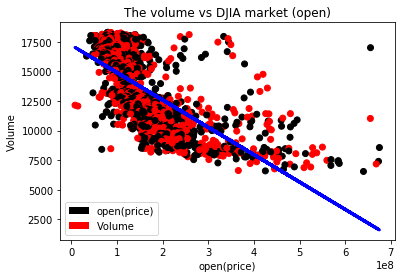

In [8]:
show_plot(Open_data,Volume_data)

## Interpretation of Figure 1
From figure 1 the relationship between DJIA market (Volume) as dependent variable and the price when the market is open as independent price $y = 3.73 * 10^{8} -  3.9*10^{8}x$  including the R -squared $(R^{2} =0.608)$ that has been calculated in (table 1) below and shown with a blue trend line  in figure 1. R- squared $(R)^{2}$ shows that the two variables were used for determining the orientation of trend line is $60$% related, meaning that the market was in the positivity when it opens.

In [9]:
def show_plot(Volume_data,Close_data):
    linear_mod =linear_model.LinearRegression()
    Volume_data =np.reshape(Volume_data,(-1,1))#converting to matrix of n x 1
    Close_data =np.reshape(Close_data,(-1,1))
    linear_mod.fit(Volume_data,Close_data)# Fitting the data point in the model
    plt.scatter(Volume_data,Close_data,color =['green','yellow'])# Plotting the initial datapoints
    plt.plot(Volume_data,linear_mod.predict(Volume_data),color ='blue',linewidth=3)
    plt.xlabel('Close(price)')
    plt.ylabel('Volume')
    plt.title('The volume vs DJIA market (close)')
    plt.show()
    return


In [10]:
import matplotlib.patches as mpatches
classes = ['Volume','close(price)']
class_color = ['green','yellow']
rec = []
for i in range(0,len(class_color)):
    rec.append(mpatches.Rectangle((0,0),1,1,fc=class_color[i]))
    plt.legend(rec,classes,loc=3)


## Figure 2: The volume DJIA market vs Market when it is closed

/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


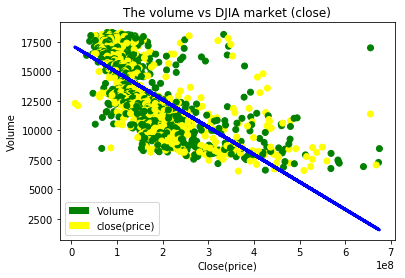

In [11]:
show_plot(Volume_data,Close_data)

## Interpretation of Figure 2

From figure 2 the relationship between DJIA market (Volume) as dependent variable and the price when the market closed as independent price $y=3.73∗10^{8}−6.063∗10^{4}$x including the R -squared $(R^{2}=0.608)$ that has been calculated in (table 1) below and shown with a blue trend line in figure 1. R- squared $(R)^{2} $shows that the two variables were used for determining the orientation of trend line is $60\%$ related, meaning that the market was in the positivity when it closed.

In [12]:
def show_plot(Volume_data,High_data,Low_data):
    linear_mod =linear_model.LinearRegression()
    Volume_data =np.reshape(Volume_data,(-1,1))#converting to matrix of n x 1
    High_data =np.reshape(High_data,(-1,1))
    Low_data =np.reshape(Low_data,(-1,1))
    linear_mod.fit(Volume_data,High_data)# Fitting the data point in the model
    linear_mod.fit(Volume_data,Low_data)# Fitting the data point in the model
    plt.figure(1)
    plt.subplot(211)
    plt.scatter(Volume_data,High_data,color =['black','red'])# Plotting the initial datapoints
    plt.plot(Volume_data,linear_mod.predict(Volume_data),color ='blue',linewidth=3)
    plt.xlabel('High')
    plt.ylabel('Volume')
    plt.title(' The volume vs High')
    plt.show()
    
    
    plt.subplot(212)
    plt.scatter(Volume_data,Low_data,color =['green','yellow'])# Plotting the initial datapoints
    plt.plot(Volume_data,linear_mod.predict(Volume_data),color ='blue',linewidth=3)
    plt.xlabel('Low')
    plt.ylabel('Volume')
    plt.title('The volume vs Low')
    plt.show()
    
    
    return


## Figure 3 : The volume of DJIA market when it is (High or Low)

/usr/local/lib/python3.4/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


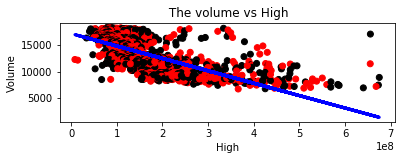

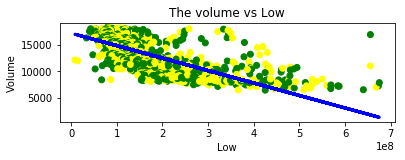

In [14]:
show_plot(Volume_data,High_data,Low_data)

## Interpertation of Figure 3
The scatter plot has been shown in figure 3 with low and high  frequencies of the market which are independence value of the depedent variable of DJIA market volume which shows out that there is good balance (relationship on it) on the DJIA market portifolio meaning that the more volume of a stock is higher implies that the DJIA market stock is more actively and  it will be asy to us to predict the moving direction of DJIA market volume of stock in the future, but otherwise (low frequencies)

## Table 1: Regression  analysis (OLS) of the problem

In [13]:
from statsmodels.formula.api import ols
model =ols('Volume_data ~ Open_data + High_data + Low_data+ Close_data',ndamu).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Volume_data   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     769.5
Date:                Mon, 15 May 2017   Prob (F-statistic):               0.00
Time:                        21:42:59   Log-Likelihood:                -38404.
No. Observations:                1989   AIC:                         7.682e+04
Df Residuals:                    1984   BIC:                         7.685e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    3.73e+08   6.42e+06     58.088      0.0

## Interpertation of Table 1
All four (open,close,high and low)  are still significant. The adjusted  R-squared now shifted down little bit by 0.607, meaning that prediction about DJIA market is better ( we now explained $60 \%$ of the variance in it using these four variables). If we did want to do an equation to predict the volume of DJIA market it would be: . Note that because the coefficient of High frequency is bigger, this means a one unit higher High frequency has a greater impact on the perfomance of DJIA market than a one unit of low frequency.

## Conclusion
Finally hypothesis are confirmed, that the market of DJIA has a positive perfomance. But using linear regression model we also find some interesting expections with looking into.